In [2]:
%matplotlib inline
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\ADMIN\Desktop\adult 3.csv")

In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
#checking for null values
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
print(df.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [7]:
print(df.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [8]:
print(df.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [9]:
print(df.gender.value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [10]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
#Removing all the rows with ?
df = df[~df.isin(['?']).any(axis=1)]

In [12]:
df.shape

(45222, 15)

In [13]:
df.drop("fnlwgt", axis=1, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8548\2191644590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("fnlwgt", axis=1, inplace=True)


In [14]:
df = df[~df['workclass'].isin(['Without-pay', 'Never-worked'])]

In [15]:
df=df[df['education']!='Preschool']
df=df[df['education']!='1st-4th']
df=df[df['education']!='5th-6th']

In [16]:
df.shape

(44458, 14)

In [17]:
df.drop("education", axis=1, inplace=True)

In [18]:
df.shape

(44458, 13)

In [19]:
#outlier detection
num_cols = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']

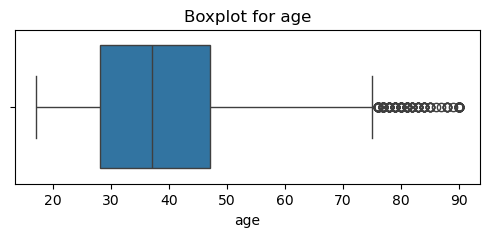

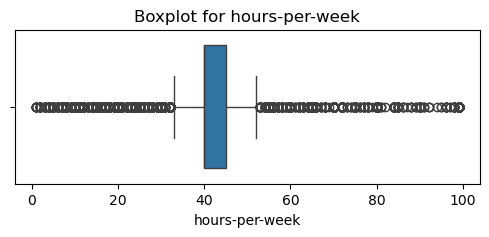

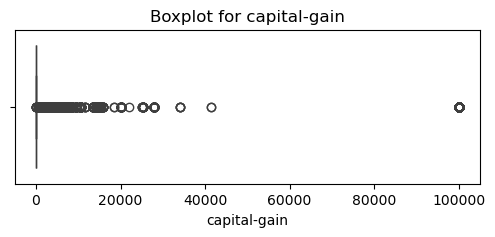

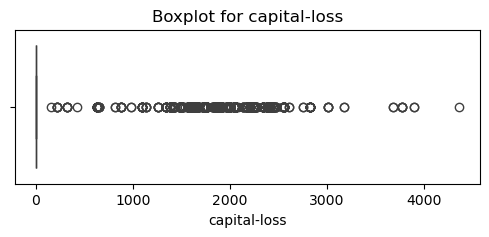

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [21]:
#outlier removal 
df=df[(df['age']<=75)&(df['age']>=17)]

In [22]:
import numpy as np
df['capital-gain'] = np.log1p(df['capital-gain'])
df['capital-loss'] = np.log1p(df['capital-loss'])


In [23]:
#Label Encodeing for income
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['income'] = le.fit_transform(df['income']) 

In [24]:
#One-Hot Encodeing for input
df = pd.get_dummies(df, drop_first=True)

In [25]:
df

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0.000000,0.0,40,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0.000000,0.0,50,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0.000000,0.0,40,1,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,8.947546,0.0,40,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,6,0.000000,0.0,30,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0.000000,0.0,38,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,9,0.000000,0.0,40,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,9,0.000000,0.0,40,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,9,0.000000,0.0,20,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [26]:

X = df.drop('income', axis=1)  # All columns except 'income'
y = df['income']               # The target column

In [27]:
from sklearn.model_selection import train_test_split
import joblib

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
joblib.dump(X_train.columns.tolist(),'model_columns.pkl')

['model_columns.pkl']

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Train the model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# 2. Predict on test data
y_pred = gb_model.predict(X_test)

# 3. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8621196697206198
Confusion Matrix:
 [[6241  315]
 [ 904 1381]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6556
           1       0.81      0.60      0.69      2285

    accuracy                           0.86      8841
   macro avg       0.84      0.78      0.80      8841
weighted avg       0.86      0.86      0.85      8841



In [29]:
 #FINE TUNINGd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import joblib

# 1. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
joblib.dump(scaler,'scaler.pkl')

# 2. Define the parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

# 3. Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# 4. Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb_model,
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1)

# 5. Fit the model to scaled training data
grid_search.fit(X_train_scaled, y_train)

# 6. Show results
print("Best Parameters:", grid_search.best_params_)
print(" Best Cross-Validated Accuracy:", grid_search.best_score_)
print(" Test Accuracy:", grid_search.score(X_test_scaled, y_test))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}
 Best Cross-Validated Accuracy: 0.8664027259157856
 Test Accuracy: 0.8684537948195905


Logistic Regression Accuracy: 0.8428
KNN Accuracy: 0.8208
Random Forest Accuracy: 0.8480
Gradient Boosting Accuracy: 0.8685


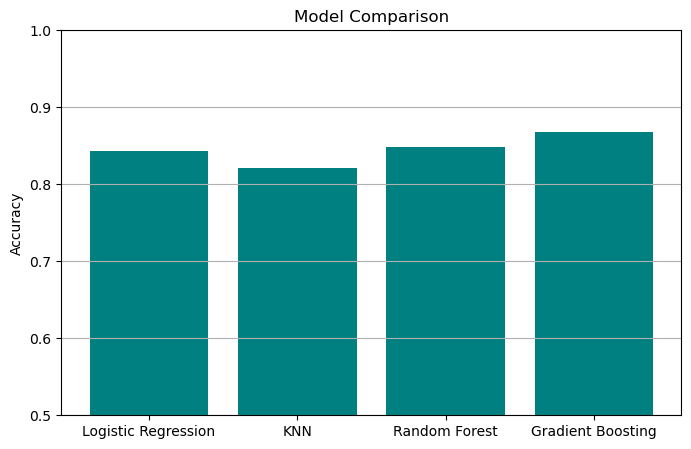

In [30]:
 from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define all models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=150)  # best tuned
}

# Store accuracies
accuracies = {}

# Train and test each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='teal')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.5, 1.0)
plt.grid(axis='y')
plt.show()

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

final_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=4,
    n_estimators=150
)

final_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=150)

In [32]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = final_model.predict(X_test_scaled)

print("Final Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Final Test Accuracy: 0.8684537948195905

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      6556
           1       0.81      0.64      0.72      2285

    accuracy                           0.87      8841
   macro avg       0.85      0.80      0.82      8841
weighted avg       0.86      0.87      0.86      8841



In [33]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [34]:
import joblib

joblib.dump(final_model, 'final_gradient_boosting_model.pkl')

['final_gradient_boosting_model.pkl']

In [35]:
import streamlit as st
import numpy as np
import joblib

In [36]:
model = joblib.load('final_gradient_boosting_model.pkl')    # Gradient Boosting or any final model
scaler = joblib.load('scaler.pkl')        # The StandardScaler used before training

In [37]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load trained model
model = joblib.load('final_gradient_boosting_model.pkl')
scaler = joblib.load('scaler.pkl') 
# Load any encoders if used (e.g., OneHotEncoder, LabelEncoder)
# encoder = joblib.load('encoder.pkl')  # optional, if you saved one

# Streamlit App Title
st.title("Employee Salary Prediction App")
st.subheader("Will the employee earn >50K or <=50K?")

# Input form
def user_input_features():
    age = st.slider("Age", 17, 90, 30)
    workclass = st.selectbox("Workclass", ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov',
                                           'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'])
    education = st.selectbox("Education", ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
                                           'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school'])
    marital_status = st.selectbox("Marital Status", ['Never-married', 'Married-civ-spouse', 'Divorced',
                                                     'Married-spouse-absent', 'Separated', 'Widowed'])
    occupation = st.selectbox("Occupation", ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial',
                                             'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical',
                                             'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv',
                                             'Armed-Forces'])
    relationship = st.selectbox("Relationship", ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'])
    race = st.selectbox("Race", ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'])
    sex = st.selectbox("Sex", ['Male', 'Female'])
    capital_gain = st.number_input("Capital Gain", min_value=0)
    capital_loss = st.number_input("Capital Loss", min_value=0)
    hours_per_week = st.slider("Hours per Week", 1, 99, 40)
    native_country = st.selectbox("Native Country", ['United-States', 'Mexico', 'Philippines', 'Germany', 'Canada',
                                                     'India', 'England', 'Cuba', 'Jamaica', 'China', 'Others'])

    data = {
        'age': age,
        'workclass': workclass,
        'education': education,
        'marital-status': marital_status,
        'occupation': occupation,
        'relationship': relationship,
        'race': race,
        'sex': sex,
        'capital-gain': capital_gain,
        'capital-loss': capital_loss,
        'hours-per-week': hours_per_week,
        'native-country': native_country
    }

    return pd.DataFrame([data])

# Get user input
input_df = user_input_features()
# Log-transform capital gain and loss to match training preprocessing
input_df['capital-gain'] = np.log1p(input_df['capital-gain'])
input_df['capital-loss'] = np.log1p(input_df['capital-loss'])
# Apply encoding to match the training data
# If you used OneHotEncoder and saved it:
# input_df_encoded = encoder.transform(input_df)
# If you manually used pd.get_dummies, recreate it here:
input_encoded = pd.get_dummies(input_df)

# Align columns with training set (ensure same order & shape)
model_columns = joblib.load("model_columns.pkl")  # Save this during training
input_encoded = input_encoded.reindex(columns=model_columns, fill_value=0)
input_scaled=scaler.transform(input_encoded)

# Prediction
prediction = model.predict(input_encoded)
pred_proba = model.predict_proba(input_encoded)

# Output''

if prediction[0] == 1:
    st.success(f"Prediction: Income >50K  (Confidence: {round(pred_proba[0][1]*100, 2)}%)")
else:
    st.warning(f"Prediction: Income <=50K (Confidence: {round(pred_proba[0][0]*100, 2)}%)")

2025-07-23 18:13:12.197 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 18:13:13.401 
  command:

    streamlit run C:\Users\ADMIN\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-23 18:13:13.402 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 18:13:13.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 18:13:13.407 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 18:13:13.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 18:13:13.413 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-23 18:13:13.414 Thread 'MainThread': mi

In [40]:


#User Input
user_input = {
    'age': 42,
    'workclass': 'Private',
    'education': 'Masters',
    'marital-status': 'Married-civ-spouse',
    'occupation': 'Exec-managerial',
    'relationship': 'Husband',
    'race': 'White',
    'sex': 'Male',
    'capital-gain': 10000,
    'capital-loss': 0,
    'hours-per-week': 50,
    'native-country': 'United-States'
}

# Convert to DataFrame
input_df = pd.DataFrame([user_input])


input_df['capital-gain'] = np.log1p(input_df['capital-gain'])
input_df['capital-loss'] = np.log1p(input_df['capital-loss'])

# One-hot encode
input_encoded = pd.get_dummies(input_df)
input_encoded = input_encoded.reindex(columns=model_columns, fill_value=0)

# Apply scaler
input_scaled = scaler.transform(input_encoded)

# Predict
prediction = model.predict(input_scaled)

# Output
print(" Prediction:", ">50K" if prediction[0] == 1 else "<=50K")

 Prediction: >50K
